### Introduction
This dataset contains housing information within a specific block. It offers an opportunity to explore various relationships between its features. For instance, you can investigate connections between the population's income levels and their residential locations within the state. Additionally, by examining the data, it becomes evident that there are some anomalies, particularly in variables such as the total number of rooms and the population size.

The Ordinary Least Squares (OLS) regression model is a fundamental statistical technique used for modeling and analyzing the relationship between a dependent variable (or target) and one or more independent variables (or predictors) in a linear fashion. Here's a brief background on the OLS regression model:
* Basic Principle: OLS is based on the principle of finding the line (in simple linear regression) or hyperplane (in multiple linear regression) that best fits the data points in such a way that it minimizes the sum of the squared differences between the observed values and the values predicted by the model.
* Linear Relationship: OLS assumes a linear relationship between the independent variables and the dependent variable. This means that changes in the independent variables are associated with proportional changes in the dependent variable.
* Objective: The primary goal of OLS is to estimate the coefficients (also known as weights) for each independent variable in the linear equation, such that the sum of the squared residuals (the differences between observed and predicted values) is minimized.
* Assumptions: OLS relies on several assumptions, including the assumption of linearity, independence of errors, homoscedasticity (constant variance of errors), and normally distributed errors.
* Coefficients: In a simple linear regression model (with one independent variable), OLS estimates two coefficients: the intercept (b0) and the slope (b1) of the regression line, represented by the equation y = b0 + b1*x.
* Multiple Regression: OLS can also be extended to multiple linear regression, where there are more than one independent variables. In this case, the model estimates coefficients for each independent variable, along with an intercept.
* Goodness of Fit: OLS provides a measure of goodness of fit, typically represented as R-squared (R²), which quantifies the proportion of the variance in the dependent variable that is explained by the independent variables.
* Use Cases: OLS regression is widely used in various fields, including economics, finance, social sciences, and machine learning. It is employed for tasks such as predicting sales based on advertising spend, analyzing the impact of factors on house prices, and much more.

OLS regression is a powerful tool for understanding and quantifying relationships between variables, making predictions, and making informed decisions based on data analysis. It serves as the foundation for many advanced regression techniques and machine learning algorithms.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd

In [6]:
df= pd.read_csv("housing1.csv")

In [7]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Checking counts for categorical variable

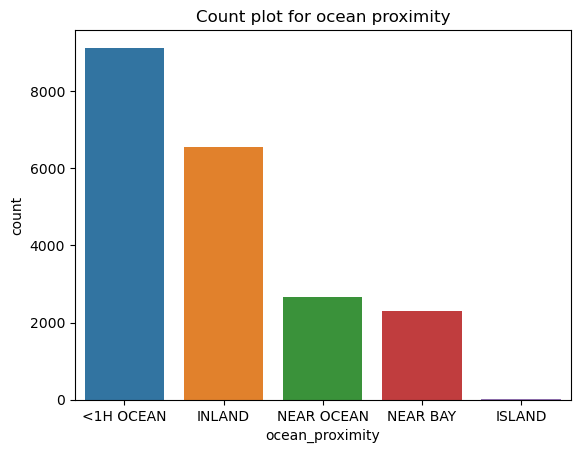

In [9]:
sns.countplot(data = df, x="ocean_proximity",order=df.ocean_proximity.value_counts().keys())
plt.title("Count plot for ocean proximity")
plt.show()

In [10]:
100 * df.ocean_proximity.value_counts()/df.shape[0]

<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: ocean_proximity, dtype: float64

#### Univariate analysis for numerical features

In [11]:
numerical_features=list(df.columns)
numerical_features.remove('ocean_proximity')
numerical_features.remove('median_house_value')

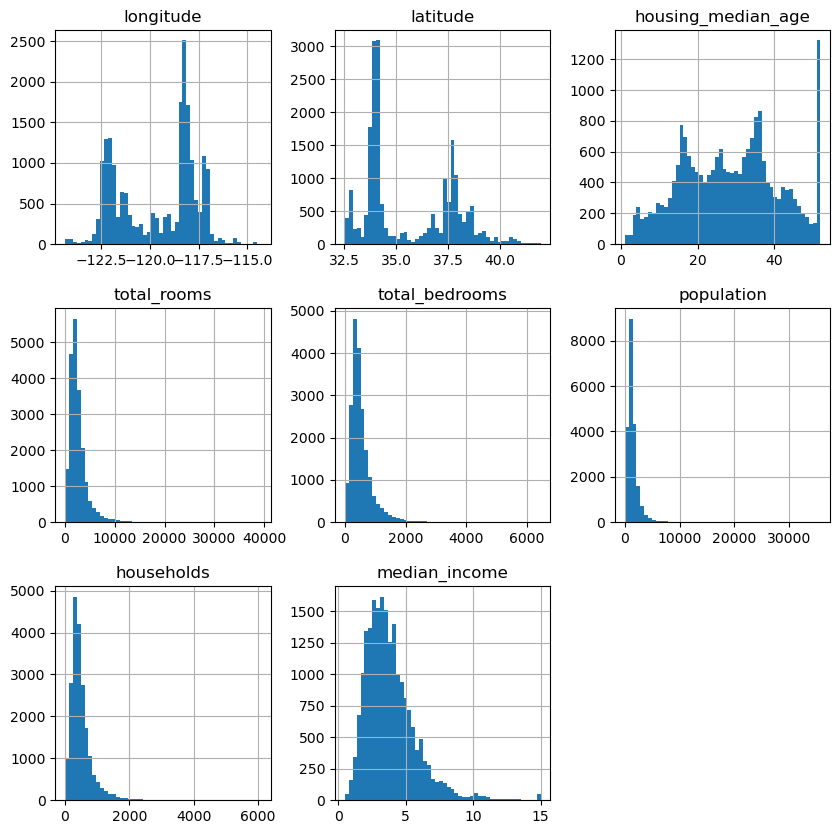

In [12]:
df[numerical_features].hist(bins=50, figsize=(10, 10))
plt.show()

#### Insights
- Total rooms, Total bedrooms, Population and households have a very similar distribution.
- Housing age looks approximately normaly distributed with some noise.
- Median Income is Right Skewed.

#### Distribution of the target: median_house_value

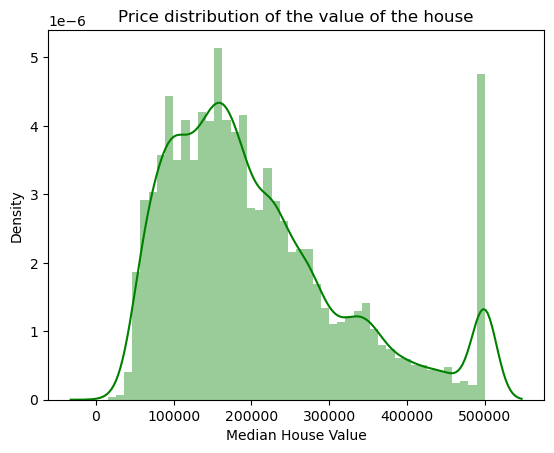

In [13]:
sns.distplot(df["median_house_value"],color='green')
plt.title("Price distribution of the value of the house")
plt.xlabel("Median House Value")
plt.show()

#### Multivariate analysis

#### Is there a relationship between age of the house and its proximity to the ocean?

Text(0.5, 1.0, 'Distribution of age of house vs ocean proximity')

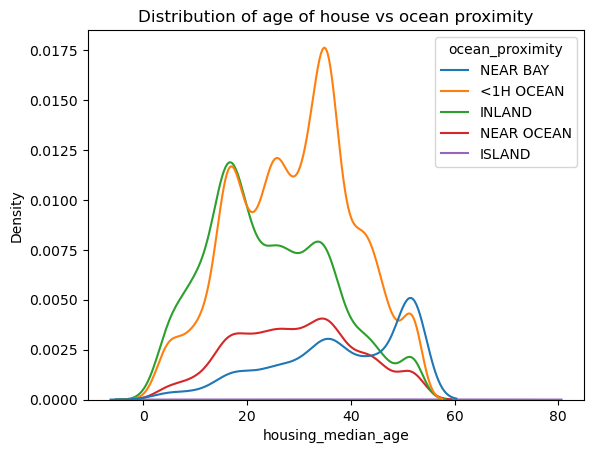

In [14]:
sns.kdeplot(data = df,x = 'housing_median_age',hue="ocean_proximity")
plt.title("Distribution of age of house vs ocean proximity")

We see here that, lots of the new housing listed are Inland or 1 hour from the ocean.

In [15]:
df.groupby(['ocean_proximity']).housing_median_age.describe()

,count,mean,std,min,25%,50%,75%,max
ocean_proximity,,,,,,,,
<1H OCEAN,9136.0,29.279225,11.644453,2.0,20.0,30.0,37.0,52.0
INLAND,6551.0,24.271867,12.018020,1.0,15.0,23.0,33.0,52.0
ISLAND,5.0,42.400000,13.164346,27.0,29.0,52.0,52.0,52.0
NEAR BAY,2290.0,37.730131,13.070385,2.0,29.0,39.0,52.0,52.0
NEAR OCEAN,2658.0,29.347254,11.840371,2.0,20.0,29.0,37.0,52.0


Even in the above, we see that Inland housing is significantly newer than the others.

In [16]:
df.groupby(['ocean_proximity']).median_house_value.describe()

,count,mean,std,min,25%,50%,75%,max
ocean_proximity,,,,,,,,
<1H OCEAN,9136.0,240084.285464,106124.292213,17500.0,164100.0,214850.0,289100.0,500001.0
INLAND,6551.0,124805.392001,70007.908494,14999.0,77500.0,108500.0,148950.0,500001.0
ISLAND,5.0,380440.000000,80559.561816,287500.0,300000.0,414700.0,450000.0,450000.0
NEAR BAY,2290.0,259212.311790,122818.537064,22500.0,162500.0,233800.0,345700.0,500001.0
NEAR OCEAN,2658.0,249433.977427,122477.145927,22500.0,150000.0,229450.0,322750.0,500001.0


It's evident that housing in the inland region is notably more affordable compared to other areas.

### Is there a relationship between an area's median income to the value of the housing?

In [17]:
print("Correlation=",np.corrcoef(df.median_income,df.median_house_value).min())

Correlation= 0.6880752079585484


There seems to be a positive correlation between the two, not too strongly though.

### Visualizing it and checking for a relationship with ocean proximity

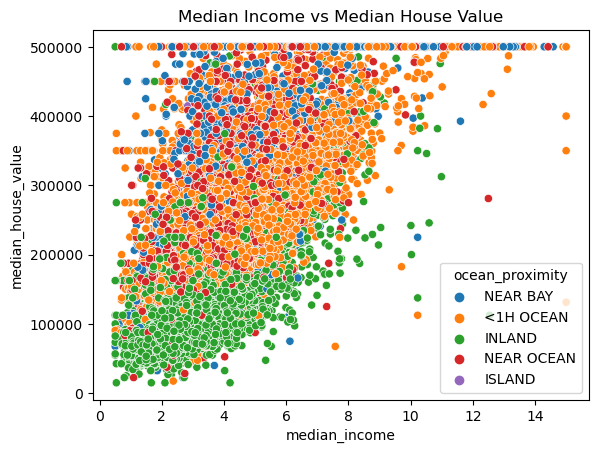

In [18]:
sns.scatterplot(x="median_income",y="median_house_value",data=df,hue="ocean_proximity")
plt.title("Median Income vs Median House Value")
plt.show()

- There is an approximate linear relationship b/w the two. Higher Median incomes are proportional to a house's value.
- Households in the Inland region have a lower value and the population there generally has a lower income.
- We see a lot of points where near ocean house values tend to be high.

### Checking for other correlations

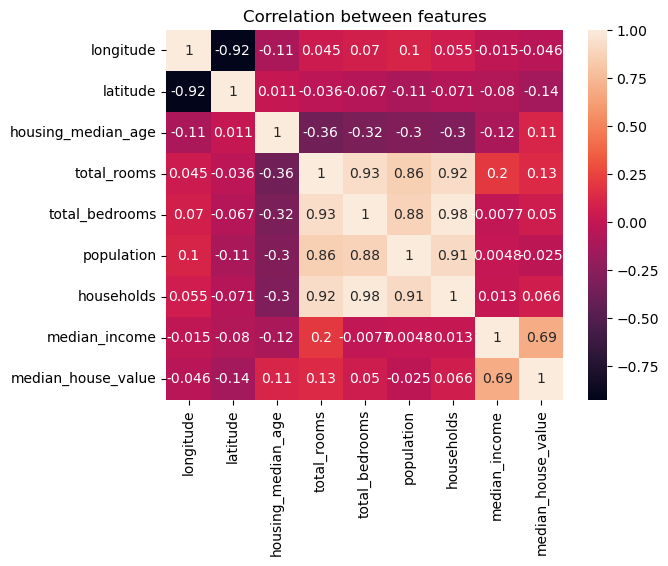

In [19]:
sns.heatmap(df.drop(['ocean_proximity'],axis=1).corr(),annot=True)
plt.title("Correlation between features")
plt.show()

- The following features are highly correlated with each other:
   - total rooms
   - total bedrooms
   - population
- Most of the other features have little to no correlation amongst themselves or with the target

### Let us combine the features that are highly correlated with each other,

In [20]:
# combining population,households and total_rooms
df['pop_per_household'] = df.population/df.households
df['pop_per_room'] = df.population/df.total_rooms
df['rooms_per_households'] = df.total_rooms / df.households

In [94]:
df.pop_per_household.describe()

count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: pop_per_household, dtype: float64

#### Looking at the distribtutions

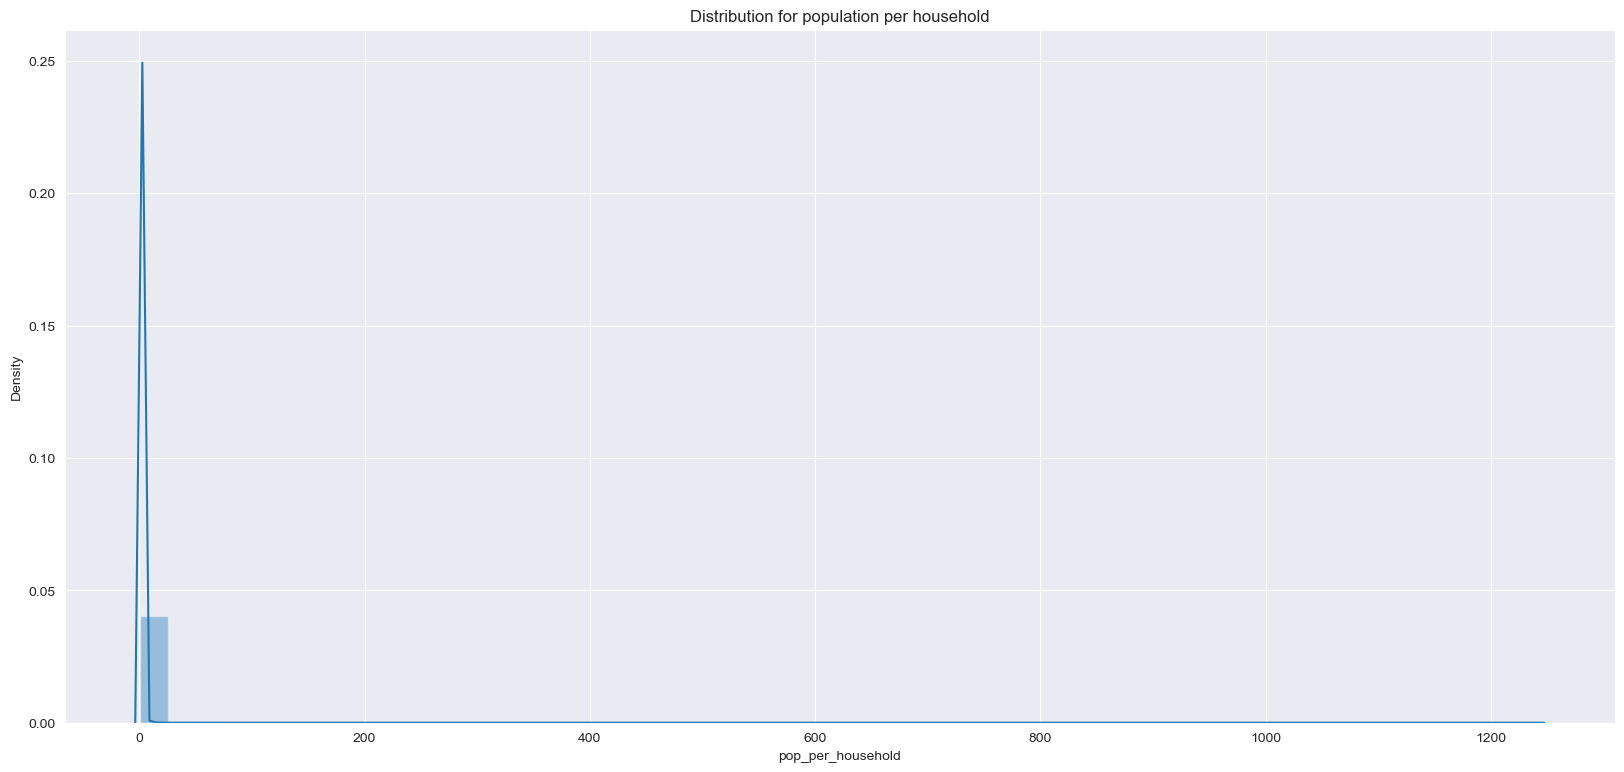

In [95]:
sns.distplot(df.pop_per_household)
plt.title("Distribution for population per household")
plt.show()

- Looks like there are some outliers making this distribution look highly skewed.
- Let us visualize the same distribtion removing top 1% data.

99th percentile of population per household is =  5.394812032520327


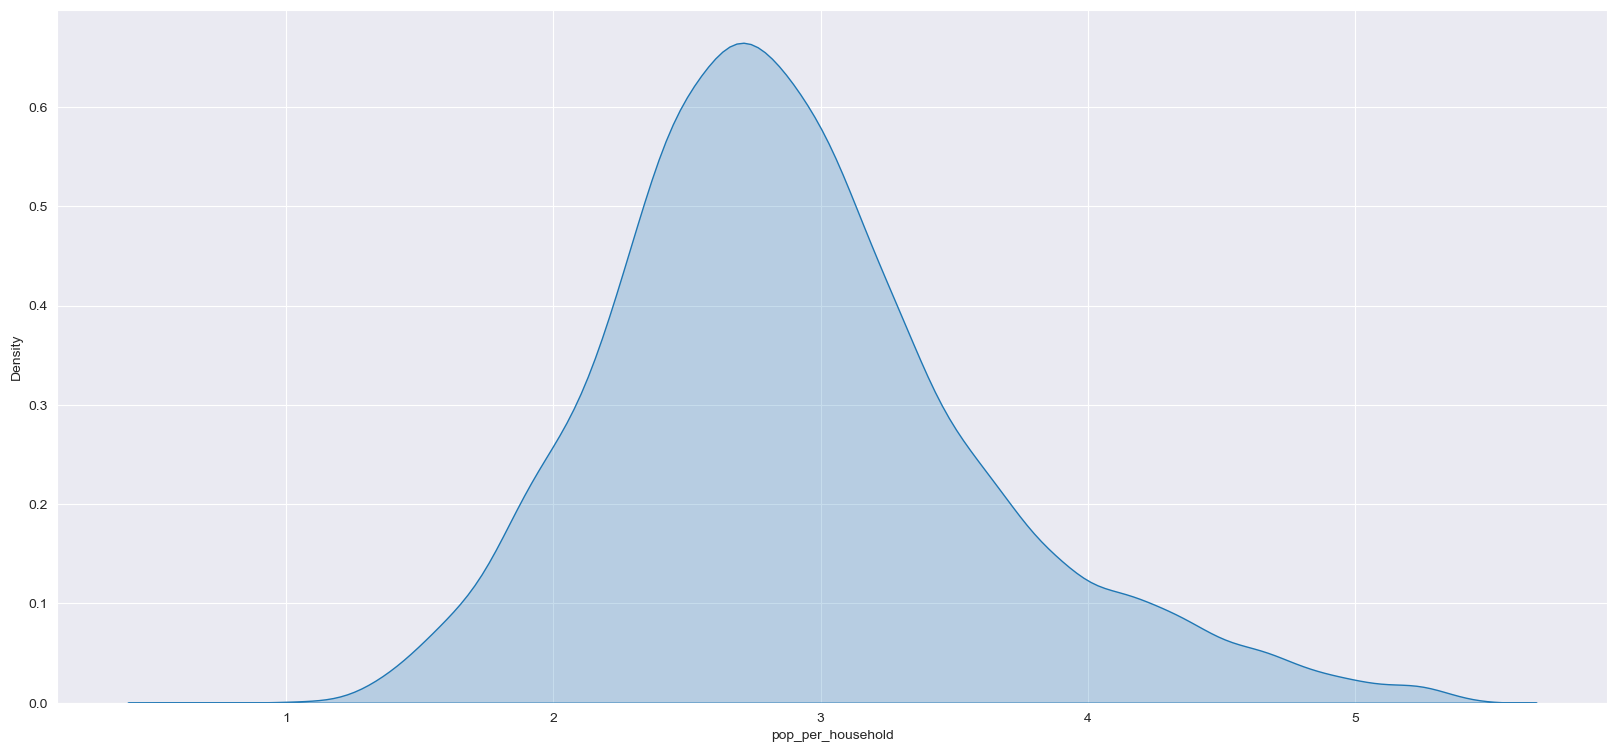

In [96]:
print("99th percentile of population per household is = ",np.quantile(df.pop_per_household,0.99))
df_pop_per_household_99 = df[df.pop_per_household<=np.quantile(df.pop_per_household,0.99)]
sns.kdeplot(df_pop_per_household_99.pop_per_household,shade=True)
plt.show()

In [97]:
df[['pop_per_household','pop_per_room','rooms_per_households']].corr()

,pop_per_household,pop_per_room,rooms_per_households
pop_per_household,1.000000,0.959563,-0.004852
pop_per_room,0.959563,1.000000,-0.040912
rooms_per_households,-0.004852,-0.040912,1.000000


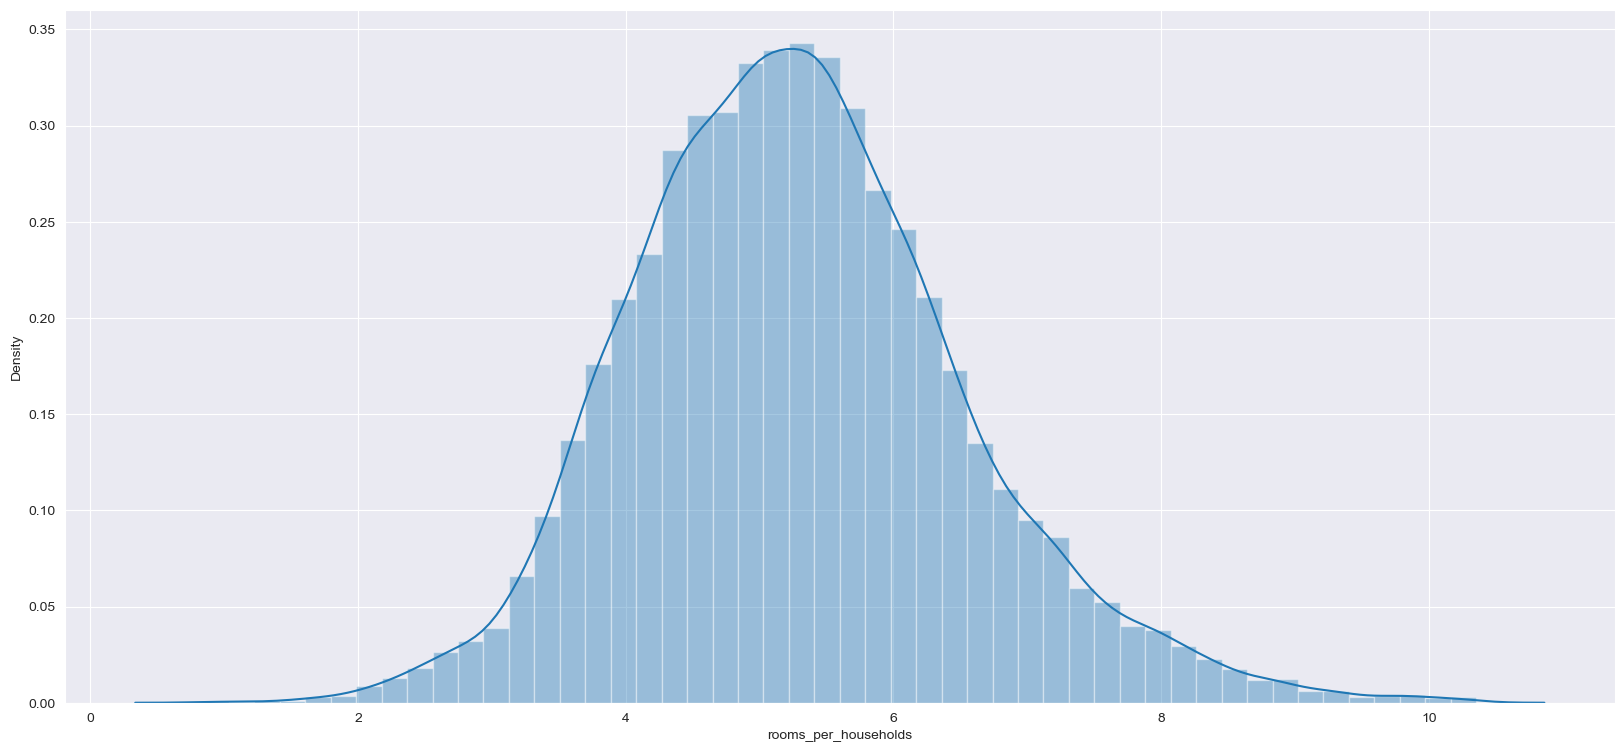

In [98]:
#similarly checking it for rooms per households
rooms_per_households_99 = df[df.rooms_per_households<=np.quantile(df.rooms_per_households,0.99)].rooms_per_households
sns.distplot(rooms_per_households_99)
plt.show()

### Let us now look into the location of these households using lat and long provided.

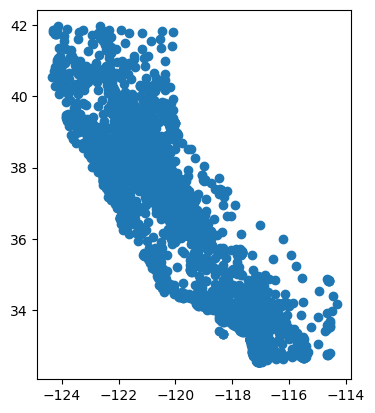

In [22]:
points = gpd.points_from_xy(df["longitude"], df["latitude"], crs="EPSG:4326")
map = gpd.GeoDataFrame (df, geometry=points)
map.plot(legend=True)

plt.show()

In [23]:
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,pop_per_household,pop_per_room,rooms_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556,0.365909,6.984127


Let us arbitarly split this into 3 regions, North, Central and South.

In [24]:
def regionize(x):
    if x >=39:
        return "North"
    elif x<36:
        return "South"
    else:
        return "Central"

### Let us visualize our newly created regions

In [25]:
df['region'] = df['latitude'].apply(regionize)

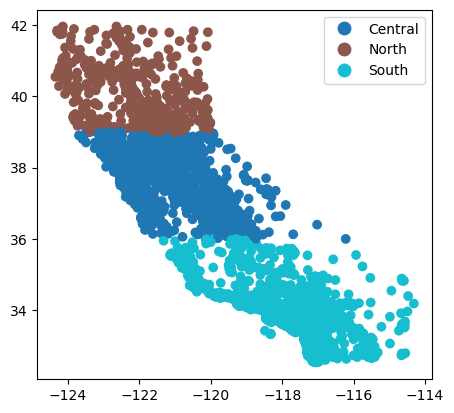

In [26]:
points = gpd.points_from_xy(df["longitude"], df["latitude"])
map = gpd.GeoDataFrame (df, geometry=points)
map.plot(column='region',legend=True)

plt.show()

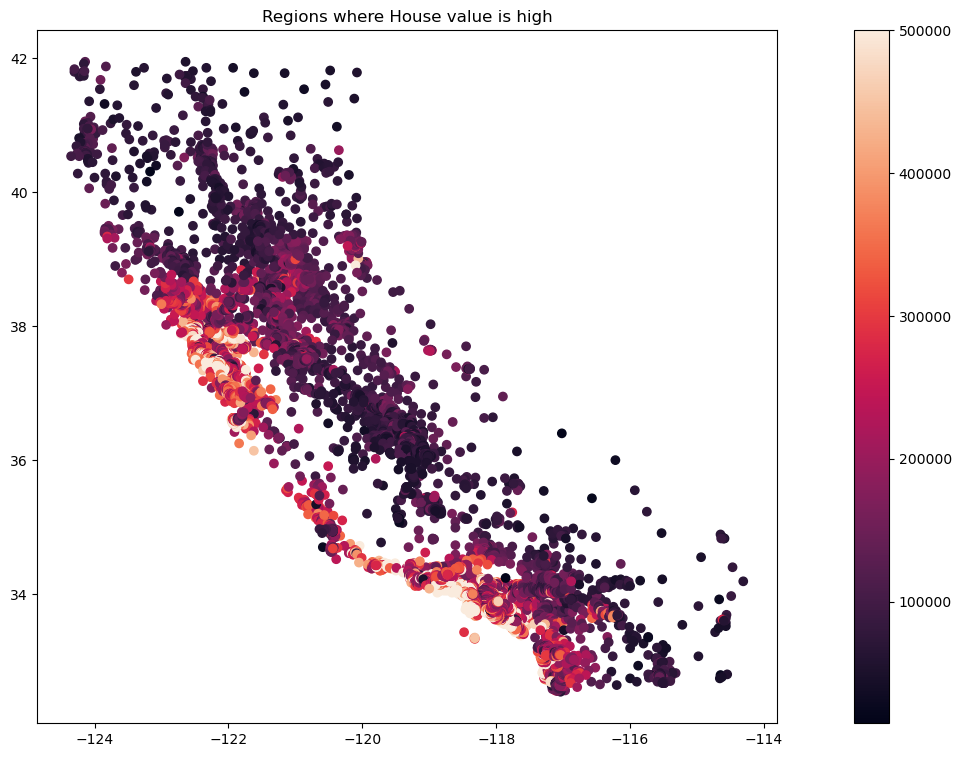

In [27]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,9)
points = gpd.points_from_xy(df["longitude"], df["latitude"])
map = gpd.GeoDataFrame (df, geometry=points)
map.plot(column='median_house_value',legend=True,cmap='rocket')
plt.title("Regions where House value is high")
plt.show()

- High valued households are near ocean.
- Higher density of high value households are in the central region.

### Labelizing our categorical features so that we can feed it into our model

In [28]:
oc = df.ocean_proximity.unique()
re = df.region.unique()
oc = {j:i+1 for i,j in enumerate(oc) }
re = {j:i+1 for i,j in enumerate(re) }

In [29]:
from sklearn.model_selection import train_test_split

#### Feature select

In [30]:
selected_features = ['housing_median_age','median_income','pop_per_household','rooms_per_households',
                     'region','ocean_proximity']
target_feat = ['median_house_value']

In [31]:
X = df[selected_features]
y = df[target_feat]

In [32]:
X.region

0        Central
1        Central
2        Central
3        Central
4        Central
          ...   
20635      North
20636      North
20637      North
20638      North
20639      North
Name: region, Length: 20640, dtype: object

In [33]:
X['region'] = X.region.map(lambda x:re[x])
X['ocean_proximity'] = X.ocean_proximity.map(lambda x:oc[x])


In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train.region.values.reshape(-1,1))
enc_f = enc.transform(X_train.region.values.reshape(-1,1)).toarray()
X_train = pd.concat([X_train,pd.DataFrame(enc_f,columns=['r1','r2','r3'],index=X_train.index)],axis=1)
enc_f = enc.transform(X_test.region.values.reshape(-1,1)).toarray()
X_test = pd.concat([X_test,pd.DataFrame(enc_f,columns=['r1','r2','r3'],index=X_test.index)],axis=1)

In [36]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train.region.values.reshape(-1,1))
enc.transform(X_train.region.values.reshape(-1,1)).toarray()
enc_f = enc.transform(X_train.region.values.reshape(-1,1)).toarray()
X_train = pd.concat([X_train,pd.DataFrame(enc_f,columns=['r1','r2','r3'],index=X_train.index)],axis=1)
enc_f = enc.transform(X_test.region.values.reshape(-1,1)).toarray()
X_test = pd.concat([X_test,pd.DataFrame(enc_f,columns=['r1','r2','r3'],index=X_test.index)],axis=1)

In [37]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train.ocean_proximity.values.reshape(-1,1))
enc_f = enc.transform(X_train.ocean_proximity.values.reshape(-1,1)).toarray()
X_train = pd.concat([X_train,pd.DataFrame(enc_f,columns=['o1','o2','o3','o4','o5'],index=X_train.index)],axis=1)
enc_f = enc.transform(X_test.ocean_proximity.values.reshape(-1,1)).toarray()
X_test = pd.concat([X_test,pd.DataFrame(enc_f,columns=['o1','o2','o3','o4','o5'],index=X_test.index)],axis=1)

In [38]:
X_train = X_train.drop(['region','ocean_proximity'],axis=1)
X_test = X_test.drop(['region','ocean_proximity'],axis=1)

In [39]:
X_train.shape

(14448, 15)

In [40]:
idx_pph = X_train[X_train.pop_per_household<=np.quantile(X_train.pop_per_household,0.999)].index
X_train = X_train[X_train.index.isin(idx_pph)]
y_train = y_train[y_train.index.isin(idx_pph)]

In [41]:
idx_pph = X_train[X_train.rooms_per_households<=np.quantile(X_train.rooms_per_households,0.999)].index
X_train = X_train[X_train.index.isin(idx_pph)]
y_train = y_train[y_train.index.isin(idx_pph)]

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
sc = PowerTransformer()
X_train['median_income'] = sc.fit_transform(X_train.median_income.values.reshape(-1,1))
X_test['median_income'] = sc.transform(X_test.median_income.values.reshape(-1,1))

X_train['housing_median_age'] = sc.fit_transform(X_train.housing_median_age.values.reshape(-1,1))
X_test['housing_median_age'] = sc.transform(X_test.housing_median_age.values.reshape(-1,1))

In [43]:
y_train = sc.fit_transform(y_train)

In [44]:
y_test = sc.transform(y_test)

In [45]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression().fit(X_train, y_train)

In [46]:
X_test  = X_test.reset_index(drop=True)

In [47]:
y_pred = ols.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
y_test_,y_pred = sc.inverse_transform(y_test),sc.inverse_transform(y_pred)

In [50]:
ols_rmse = mean_squared_error(y_test_, y_pred,squared=False)
ols_rmse

68923.1678823583

In [51]:
y_test_.shape,y_pred.shape

((6192, 1), (6192, 1))

In [52]:
preds = pd.DataFrame({"true":y_test_.flatten(),"pred":y_pred.flatten()})

In [53]:
preds['nature'] = preds[['pred','true']]\
.apply(lambda x: "True" if mean_squared_error([x[0]], [x[1]],squared=False)<69829.41918581325*1.2 else "False",axis=1)

<Axes: xlabel='pred', ylabel='true'>

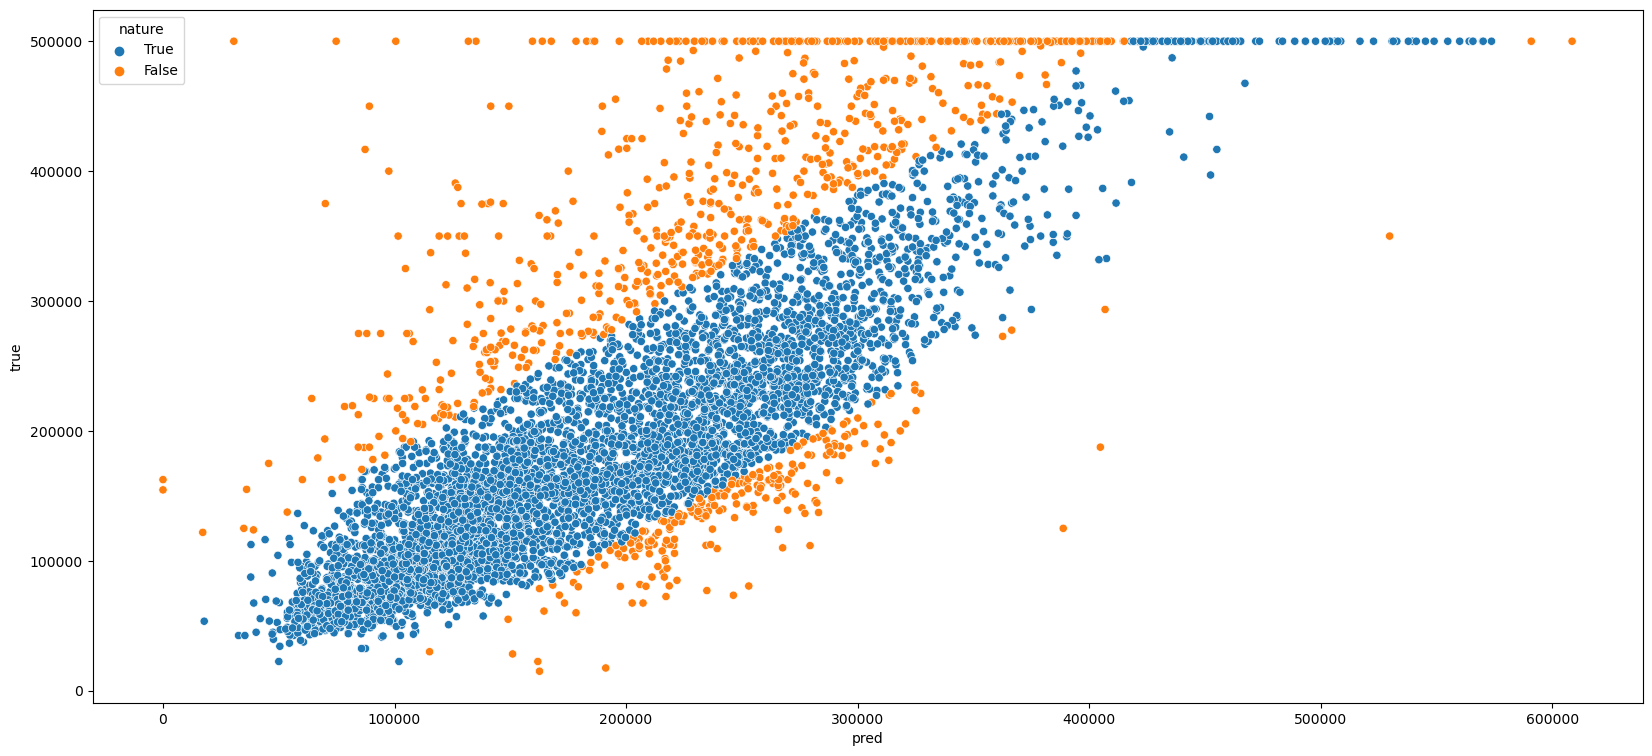

In [54]:
sns.scatterplot(data=preds,x="pred",y="true",hue="nature")

In [55]:
from sklearn.metrics import r2_score

In [56]:
ols_r2 = r2_score(y_test_, y_pred)
ols_r2

0.6380755877356075

### Lasso

In [57]:
from sklearn import linear_model

In [58]:
clf_l1 = linear_model.Lasso(alpha=0.0001)

In [59]:
clf_l1.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [60]:
y_pred = clf_l1.predict(X_test)

In [61]:
y_test_,y_pred = sc.inverse_transform(y_test.reshape(-1,1)),sc.inverse_transform(y_pred.reshape(-1,1))

In [62]:
l1_rmse = mean_squared_error(y_test_, y_pred,squared=False)
l1_rmse

68894.26325449409

In [63]:
preds = pd.DataFrame({"true":y_test_.flatten(),"pred":y_pred.flatten()})

In [64]:
preds['nature'] = preds[['pred','true']]\
.apply(lambda x: "True" if mean_squared_error([x[0]], [x[1]],squared=False)<69829.41918581325*1.2 else "False",axis=1)

<Axes: xlabel='pred', ylabel='true'>

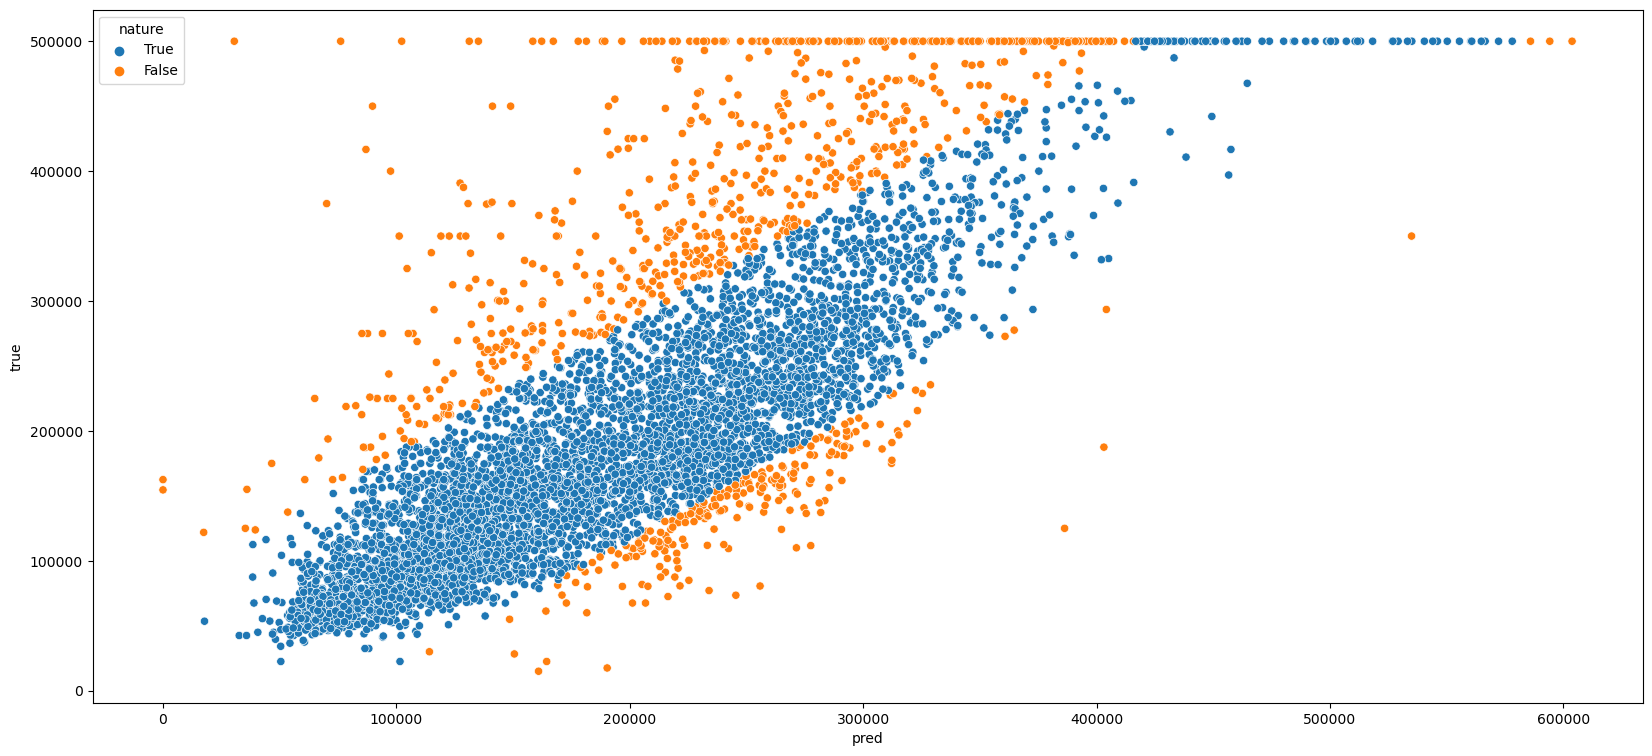

In [65]:
sns.scatterplot(data=preds,x="pred",y="true",hue="nature")

In [66]:
l1_r2 = r2_score(y_test_, y_pred)
l1_r2

0.6383790879133543

### Ridge

In [67]:
from sklearn.linear_model import Ridge

In [68]:
clf_l2 = linear_model.Ridge(alpha=0.0001)

In [69]:
clf_l2.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [70]:
y_pred = clf_l2.predict(X_test)

In [71]:
y_test_,y_pred = sc.inverse_transform(y_test.reshape(-1,1)),sc.inverse_transform(y_pred.reshape(-1,1))

In [72]:
l2_rmse = mean_squared_error(y_test_, y_pred,squared=False)
l2_rmse

68874.64254676935

In [73]:
preds = pd.DataFrame({"true":y_test_.flatten(),"pred":y_pred.flatten()})

In [74]:
preds['nature'] = preds[['pred','true']]\
.apply(lambda x: "True" if mean_squared_error([x[0]], [x[1]],squared=False)<69829.41918581325*1.2 else "False",axis=1)

<Axes: xlabel='pred', ylabel='true'>

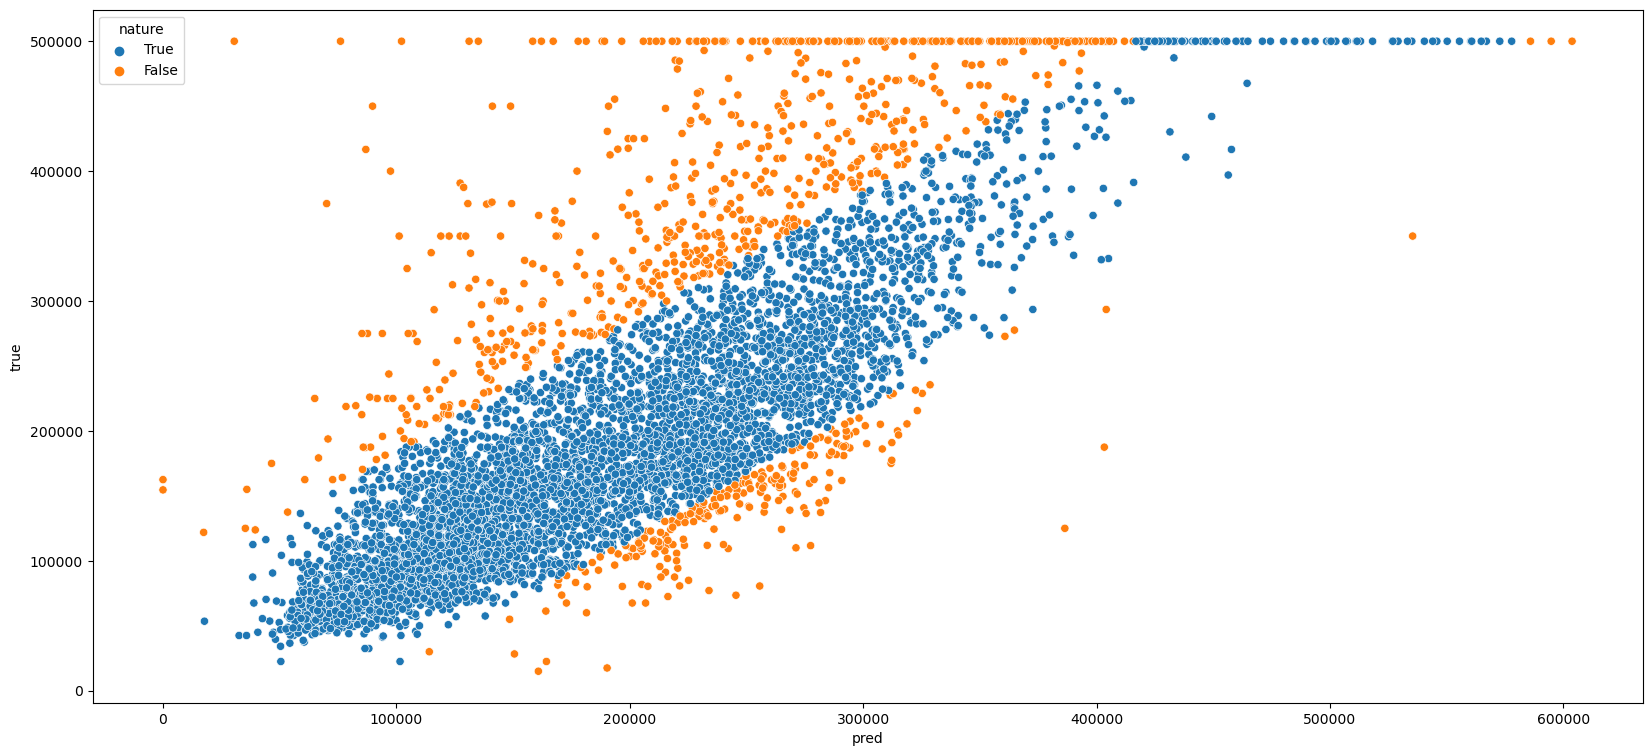

In [75]:
sns.scatterplot(data=preds,x="pred",y="true",hue="nature")

In [76]:
l2_r2 = r2_score(y_test_, y_pred)
l2_r2

0.6385850338816481

### Elastic

In [77]:
from sklearn.linear_model import ElasticNet

In [78]:
clf_elastic = linear_model.ElasticNet(alpha=0.0001)

In [79]:
clf_elastic.fit(X_train,y_train)

ElasticNet(alpha=0.0001)

In [80]:
y_pred = clf_elastic.predict(X_test)

In [81]:
y_test_,y_pred = sc.inverse_transform(y_test.reshape(-1,1)),sc.inverse_transform(y_pred.reshape(-1,1))

In [82]:
elastic_rmse = mean_squared_error(y_test_, y_pred,squared=False)
elastic_rmse

68889.58137197903

In [83]:
preds = pd.DataFrame({"true":y_test_.flatten(),"pred":y_pred.flatten()})

In [84]:
preds['nature'] = preds[['pred','true']]\
.apply(lambda x: "True" if mean_squared_error([x[0]], [x[1]],squared=False)<69829.41918581325*1.2 else "False",axis=1)

<Axes: xlabel='pred', ylabel='true'>

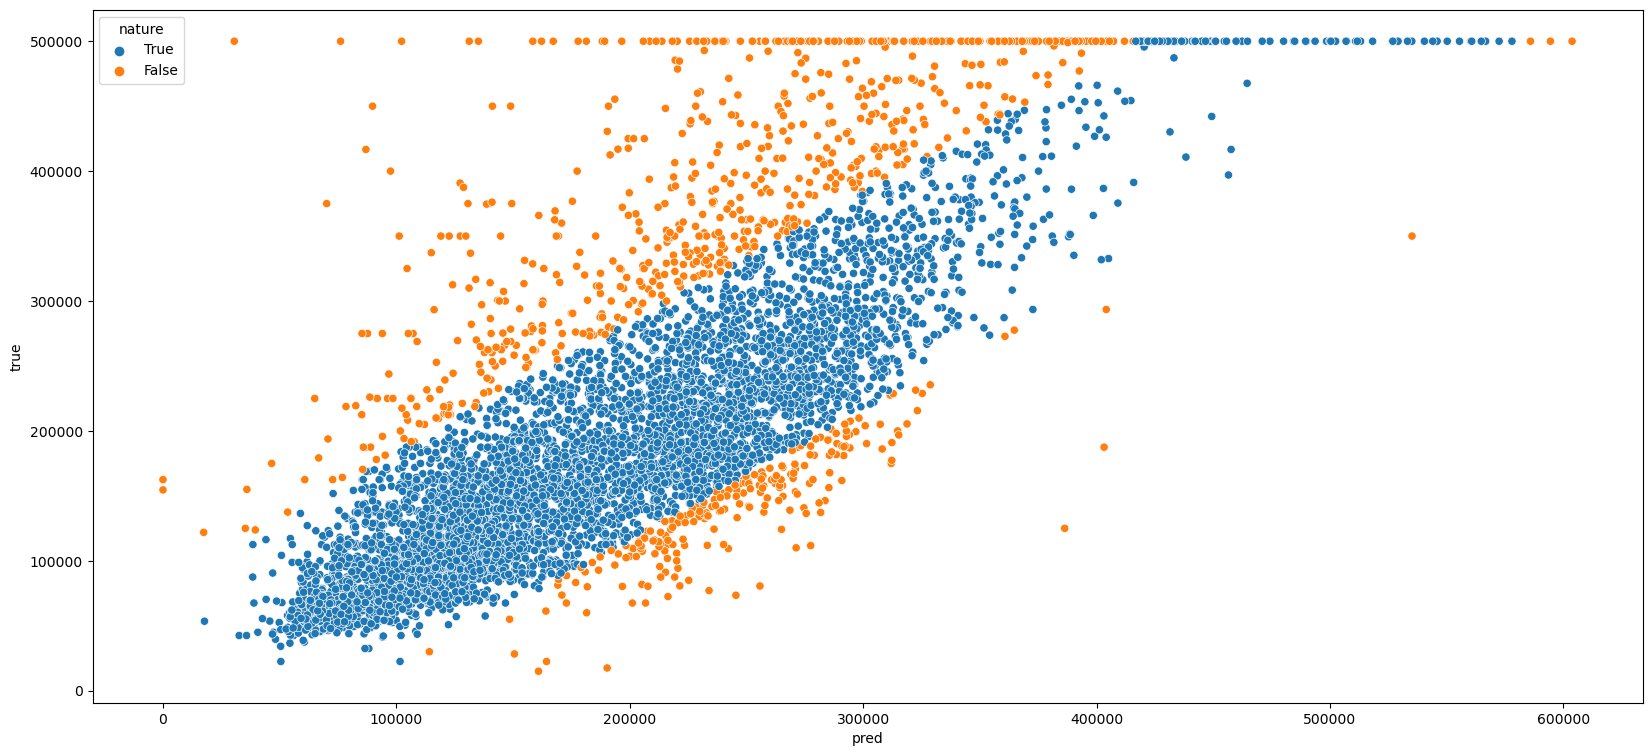

In [85]:
sns.scatterplot(data=preds,x="pred",y="true",hue="nature")

In [86]:
elastic_r2 = r2_score(y_test_, y_pred)
elastic_r2

0.6384282359560824

### Comparing results

In [87]:
results = pd.DataFrame({"model":["OLS","L1","L2","elastic"],"RMSE":[ols_rmse,l1_rmse,l2_rmse,elastic_rmse],
              "R2":[ols_r2,l1_r2,l2_r2,elastic_r2]},)

In [88]:
results

,model,RMSE,R2
0,OLS,68923.167882,0.638076
1,L1,68894.263254,0.638379
2,L2,68874.642547,0.638585
3,elastic,68889.581372,0.638428


<Axes: xlabel='model', ylabel='RMSE'>

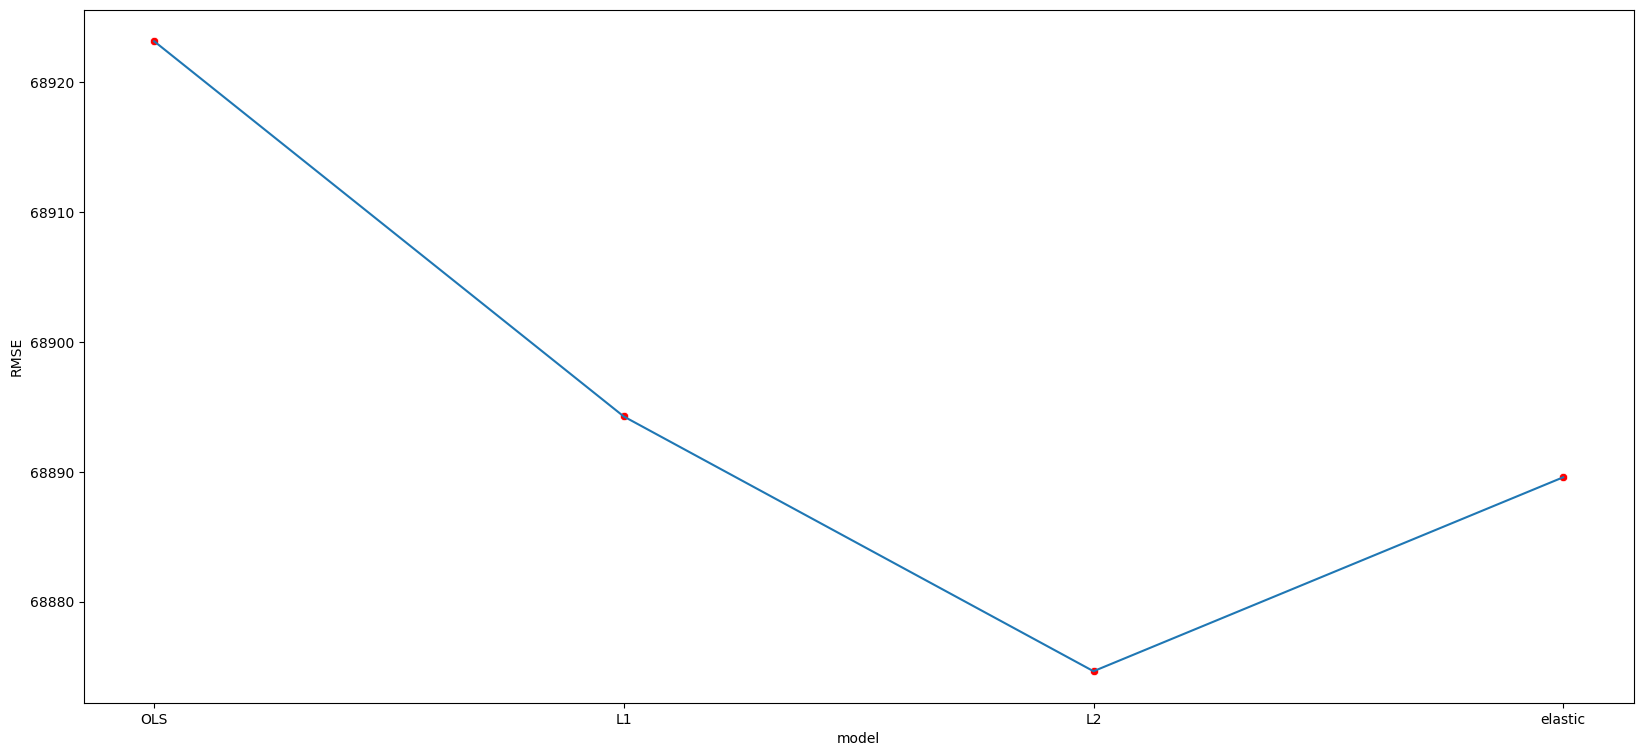

In [89]:
sns.lineplot(data=results,x="model",y="RMSE")
sns.scatterplot(data=results,x="model",y="RMSE",color="red")

<Axes: xlabel='model', ylabel='R2'>

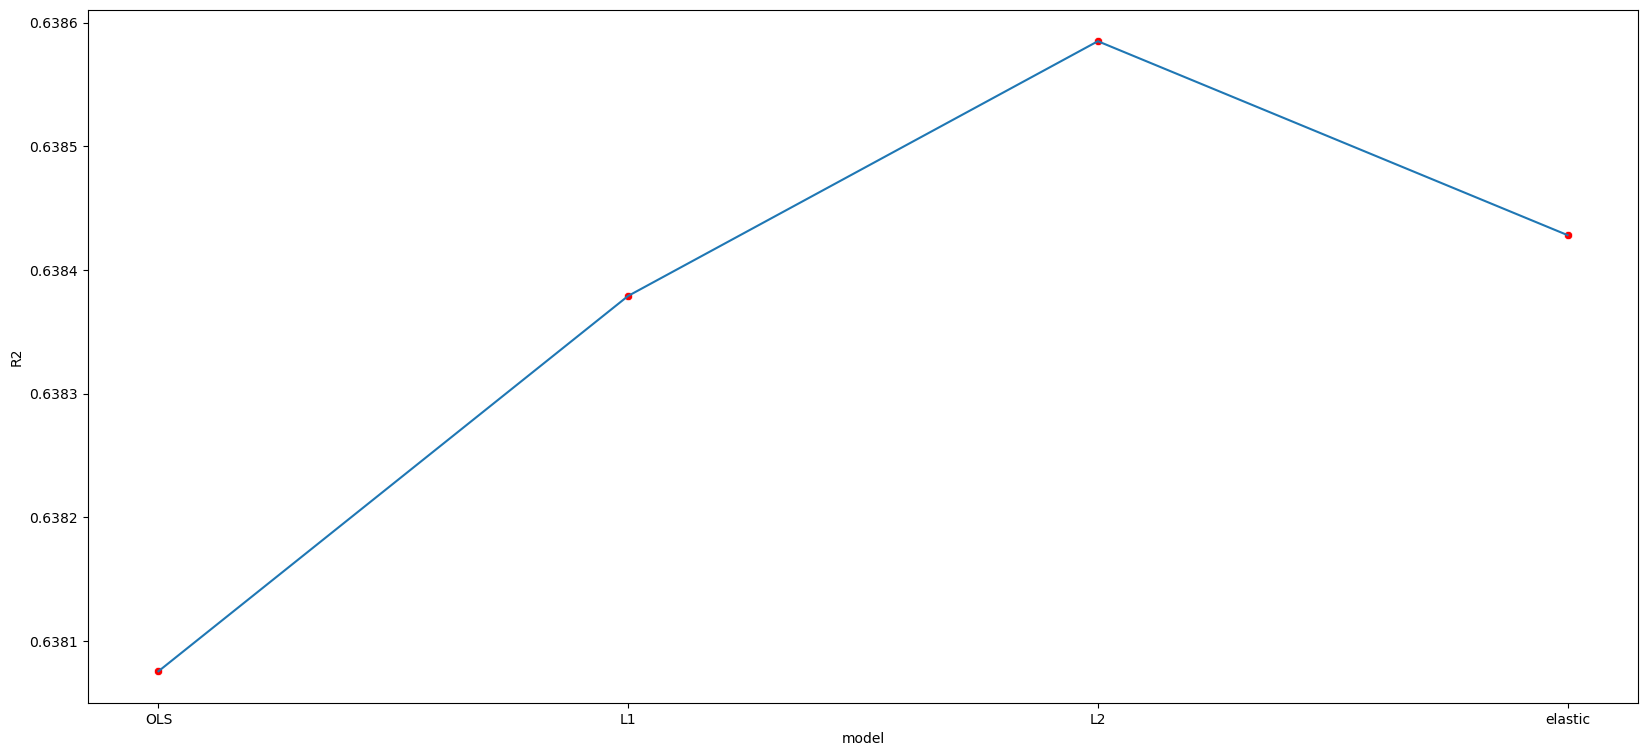

In [90]:
sns.lineplot(data=results,x="model",y="R2")
sns.scatterplot(data=results,x="model",y="R2",color="red")

From all the models of linear regression which we have used to predict the target value, the ridge model has given the lowest RMSE and highest R2 value.

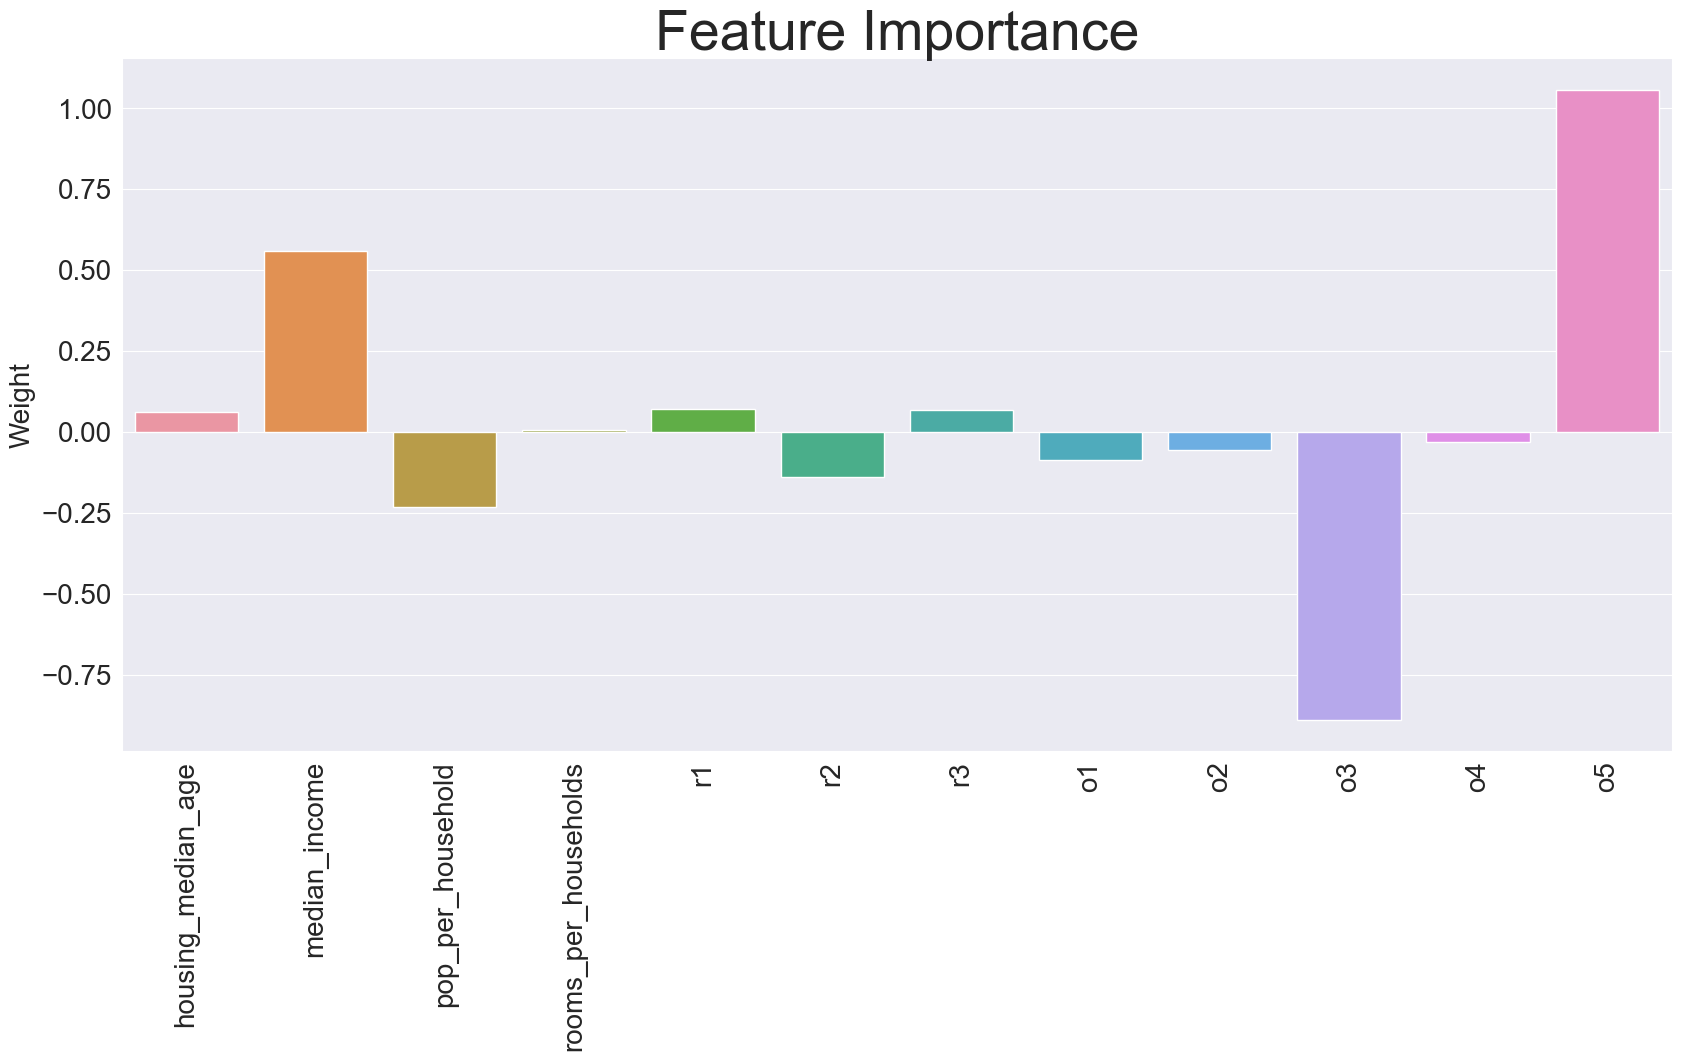

In [91]:
sns.set_style("darkgrid")
sns.barplot(x = X_train.columns,y=clf_l2.coef_[0])
plt.ylabel("Weight",size=20)
plt.xticks(rotation=90,size=20)
plt.yticks(rotation=0,size=20)
plt.title("Feature Importance",size=40)
plt.show()

### Interpretation

* The coefficients(W) indicate the strength and direction of the linear relationship between each feature and the target variable. 
* If is W positive, it means that as 'feature1' increases, the model predicts that the 'target' variable will increase as well. 
* If W is negative, it means that as 'feature1' increases, the model predicts that the 'target' variable will decrease.


### Feature Importance for our model
- Median Income is a strong feature having high positive relationship with target.

## Summary 
- The initial model employed was an Ordinary Least Squares (OLS) regression model. In this model, linear regression was utilized to establish a linear equation characterized by coefficients represented as w=(w1,…,wpw=(w1,…,wp), with the primary objective of minimizing the sum of squared differences between the actual target values within the dataset and the predictions generated by the linear equation approximation.
- Based on the outcomes observed from various regression models, it can be concluded that the most effective model is Ridge Regression. Ridge Regression stands out as it tackles certain limitations of Ordinary Least Squares (OLS) by introducing an l2 regularization penalty to control the magnitudes of the coefficients.

## Limitations and future improvements:

- Linear regression is a powerful statistical technique for modeling the relationship between a dependent variable and one or more independent variables. However, like any statistical method, it has its limitations and areas for potential improvement:

### Limitations:

#### Linearity Assumption: 
- Linear regression assumes that the relationship between the variables is linear. If the true relationship is nonlinear, linear regression may provide a poor fit to the data. Future improvements can involve using n#### onlinear regression models or transforming variables to better capture nonlinear relationships.
#### Assumption of Independence: 
- Linear regression assumes that the residuals (the differences between observed and predicted values) are independent of each other. Violation of this assumption, such as in time series data or spatial data, can lead to biased parameter estimates. Future work may involve the use of time series models or spatial regression techniques.
#### Multicollinearity: 
- When independent variables are highly correlated with each other, it can lead to multicollinearity issues. This can make it challenging to interpret the individual effects of the variables. Future improvements may involve techniques for dealing with multicollinearity, such as variable selection methods or ridge regression.
#### Heteroscedasticity: 
- Linear regression assumes constant variance of residuals across all levels of the independent variables (homoscedasticity). When the variance is not constant (heteroscedasticity), confidence intervals and hypothesis tests may be invalid. Future improvements can involve robust regression methods that are less sensitive to heteroscedasticity.
#### Outliers and Influential Points: 
- Linear regression can be sensitive to outliers and influential points, which can disproportionately affect parameter estimates. Robust regression techniques or outlier detection methods can be used to address this issue.
### Future Improvements:

#### Advanced Model Selection: 
- Employ more sophisticated model selection techniques, such as stepwise regression, Bayesian model selection, or machine learning algorithms like Lasso and Random Forest, to identify the most relevant independent variables and improve model performance.
#### Nonlinear Regression: 
- Consider using nonlinear regression models, like polynomial regression or generalized additive models, when the relationship between variables is nonlinear. This can capture more complex patterns in the data.
#### Bayesian Regression: 
- Bayesian linear regression can provide more robust estimates by incorporating prior information and allowing for uncertainty quantification.
Machine Learning Integration: Combine linear regression with machine learning techniques, such as ensemble methods and deep learning, for more accurate predictions and better handling of complex data.
#### Feature Engineering: 
- Invest in feature engineering to create meaningful and relevant independent variables. Feature selection and dimensionality reduction techniques can help streamline the model.
#### Model Interpretability: 
- Develop methods to enhance the interpretability of regression models, such as partial dependence plots, feature importance analysis, and model-agnostic interpretation techniques.
#### Hyper-parameter tuning
- Hyperparameter tuning refers to the process of finding the optimal set of hyperparameters for a machine learning model to achieve the best possible performance on a given task. Hyperparameters are parameters that are not learned from the data but are set prior to training the model. Tuning these hyperparameters is crucial because they can significantly impact the model's performance, including its accuracy, generalization ability, and training speed.

In summary, while linear regression is a valuable tool, its limitations should be considered, and future improvements can involve advanced modeling techniques, better handling of data complexities, and increased model interpretability. The choice of improvements will depend on the specific challenges and goals of the analysis.